In [43]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [44]:
# Universe 
x_income = np.arange(0, 10.1, 0.1)
x_family = np.arange(0, 8.1, 0.1)
x_house  = np.arange(1, 5.1, 0.1)

# Output universe
x_output = np.arange(0, 101, 1)


# Fungsi Keanggotaan

In [45]:
# Pendapatan
inc_low  = fuzz.trapmf(x_income, [0, 0, 2, 4])
inc_mid  = fuzz.trimf(x_income, [2, 5, 8])
inc_high = fuzz.trapmf(x_income, [6, 8, 10, 10])

# Tanggungan
fam_few  = fuzz.trapmf(x_family, [0, 0, 1, 3])
fam_mid  = fuzz.trimf(x_family, [2, 4, 6])
fam_many = fuzz.trapmf(x_family, [4, 6, 8, 8])

# Kondisi rumah
house_good = fuzz.trapmf(x_house, [1, 1, 2, 3])
house_mid  = fuzz.trimf(x_house, [2, 3, 4])
house_bad  = fuzz.trapmf(x_house, [3, 4, 5, 5])

# Output (untuk visualisasi kategori)
out_low  = fuzz.trapmf(x_output, [0, 0, 20, 40])
out_mid  = fuzz.trimf(x_output, [30, 50, 70])
out_high = fuzz.trapmf(x_output, [60, 80, 100, 100])


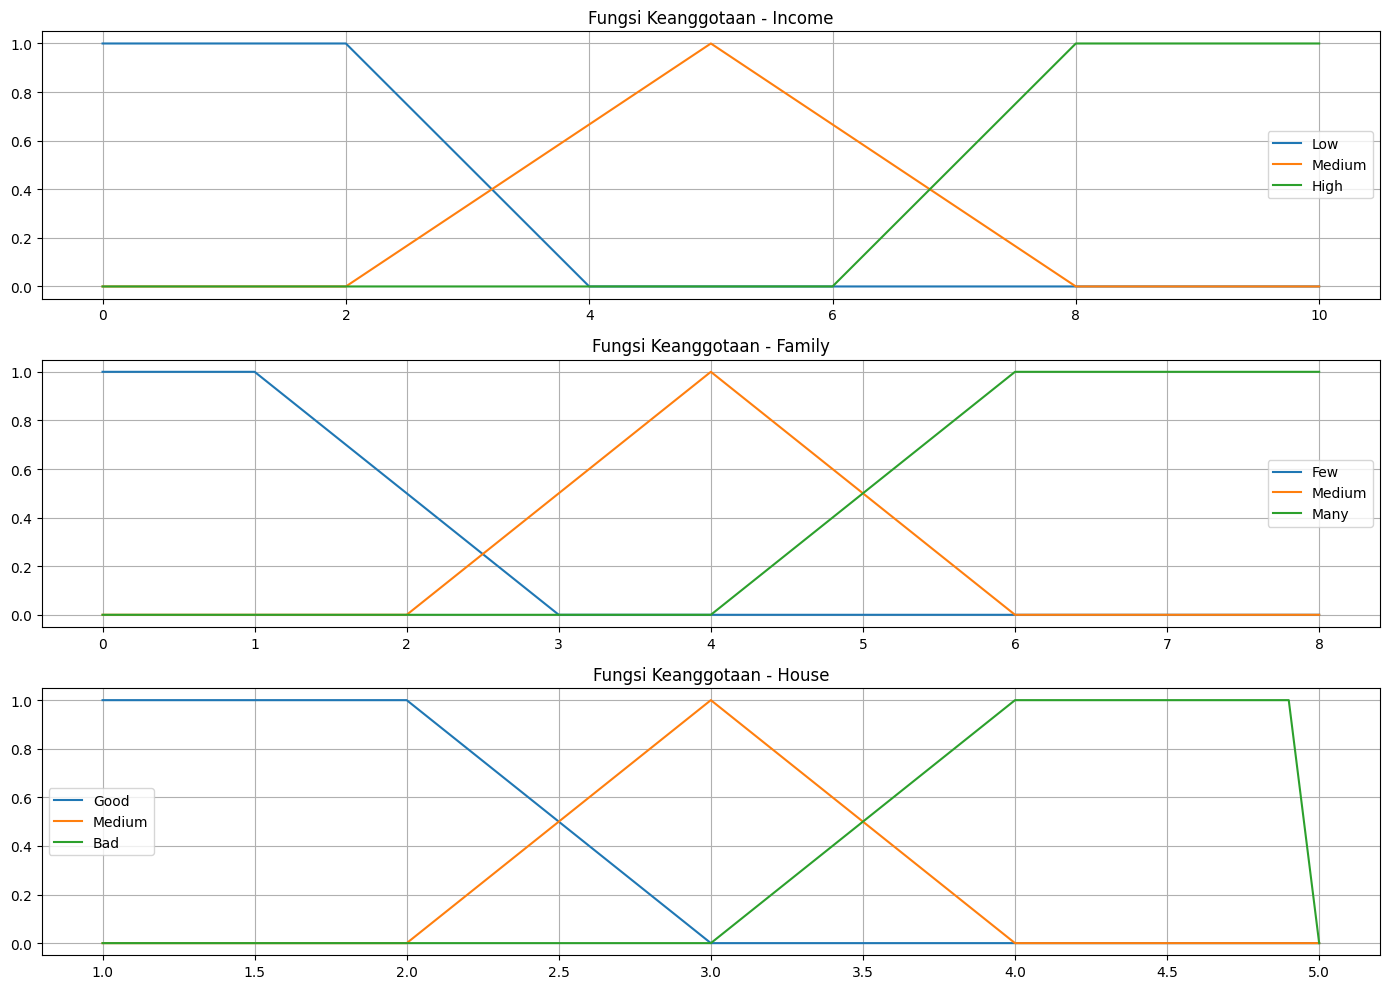

In [46]:
def plot_membership():
    plt.figure(figsize=(14, 10), dpi=100)

    # INCOME
    ax1 = plt.subplot(3, 1, 1)
    ax1.plot(x_income, inc_low, label="Low")
    ax1.plot(x_income, inc_mid, label="Medium")
    ax1.plot(x_income, inc_high, label="High")
    ax1.set_title("Fungsi Keanggotaan - Income")
    ax1.grid(True)
    ax1.legend()

    # FAMILY
    ax2 = plt.subplot(3, 1, 2)
    ax2.plot(x_family, fam_few, label="Few")
    ax2.plot(x_family, fam_mid, label="Medium")
    ax2.plot(x_family, fam_many, label="Many")
    ax2.set_title("Fungsi Keanggotaan - Family")
    ax2.grid(True)
    ax2.legend()

    # HOUSE
    ax3 = plt.subplot(3, 1, 3)
    ax3.plot(x_house, house_good, label="Good")
    ax3.plot(x_house, house_mid, label="Medium")
    ax3.plot(x_house, house_bad, label="Bad")
    ax3.set_title("Fungsi Keanggotaan - House")
    ax3.grid(True)
    ax3.legend()

    plt.tight_layout()
    plt.show()

plot_membership()



# Fungsi Output

In [47]:
out_low  = fuzz.trapmf(x_output, [0, 0, 20, 40])
out_mid  = fuzz.trimf(x_output, [30, 50, 70])
out_high = fuzz.trapmf(x_output, [60, 80, 100, 100])


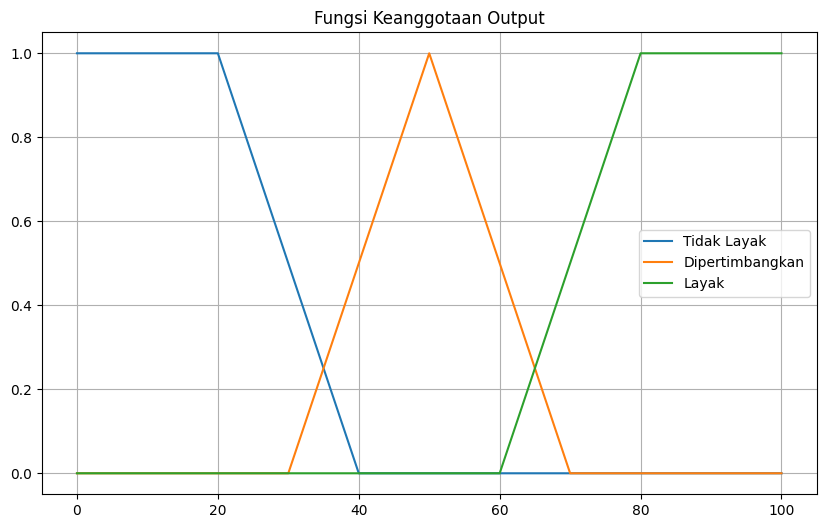

In [48]:
def plot_output_mf():
    plt.figure(figsize=(10,6))
    plt.plot(x_output, out_low, label="Tidak Layak")
    plt.plot(x_output, out_mid, label="Dipertimbangkan")
    plt.plot(x_output, out_high, label="Layak")
    plt.title("Fungsi Keanggotaan Output")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_output_mf()


# Singleton

In [49]:
M = [
    [   # Income Low
        [90, 80, 70],
        [80, 70, 60],
        [75, 65, 55]
    ],
    [   # Income Mid
        [70, 60, 50],
        [60, 50, 40],
        [55, 45, 35]
    ],
    [   # Income High
        [40, 30, 20],
        [35, 25, 15],
        [30, 20, 10]
    ]
]


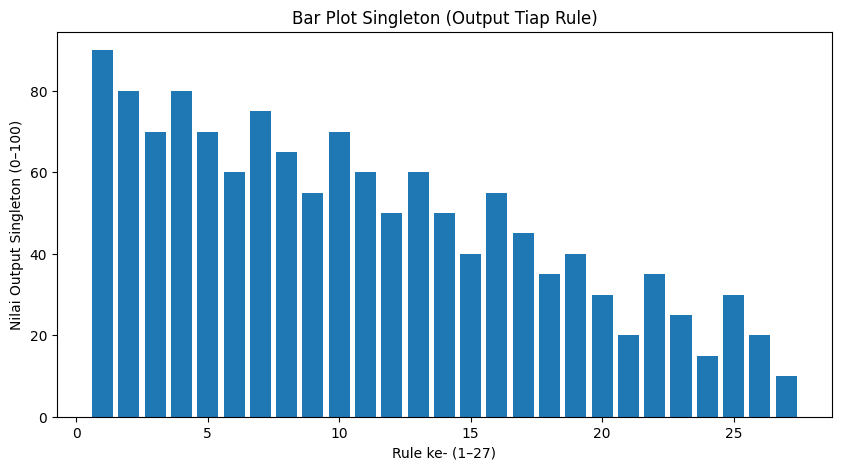

In [50]:
#Output singleton
def plot_singletons_bar():
    plt.figure(figsize=(10, 5))

    Z = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                Z.append(M[i][j][k])

    plt.bar(range(1, 28), Z)
    plt.title("Bar Plot Singleton (Output Tiap Rule)")
    plt.xlabel("Rule ke- (1–27)")
    plt.ylabel("Nilai Output Singleton (0–100)")
    plt.show()

plot_singletons_bar()

#  Sugeno

In [51]:
def sugeno(income_value, family_value, house_value):

    # fuzzification
    in_1 = [
        fuzz.interp_membership(x_income, inc_low, income_value),
        fuzz.interp_membership(x_income, inc_mid, income_value),
        fuzz.interp_membership(x_income, inc_high, income_value)
    ]

    in_2 = [
        fuzz.interp_membership(x_family, fam_few, family_value),
        fuzz.interp_membership(x_family, fam_mid, family_value),
        fuzz.interp_membership(x_family, fam_many, family_value)
    ]

    in_3 = [
        fuzz.interp_membership(x_house, house_good, house_value),
        fuzz.interp_membership(x_house, house_mid, house_value),
        fuzz.interp_membership(x_house, house_bad, house_value)
    ]

    rules_detail = []
    firing = []
    weighted = []

    for i in range(3):
        for j in range(3):
            for k in range(3):
                μ = np.min([in_1[i], in_2[j], in_3[k]])
                z = M[i][j][k]
                w = μ * z

                firing.append(μ)
                weighted.append(w)

                rules_detail.append({
                    "rule": f"R({i},{j},{k})",
                    "μ_income": in_1[i],
                    "μ_family": in_2[j],
                    "μ_house": in_3[k],
                    "μ_rule": μ,
                    "z": z,
                    "weighted": w
                })

    # Defuzzification
    pembilang = np.sum(weighted)
    penyebut = np.sum(firing)
    result = pembilang / penyebut if penyebut != 0 else 0

    if result < 40:
        kategori = "Tidak Layak"
    elif result < 60:
        kategori = "Dipertimbangkan"
    else:
        kategori = "Layak"

    return {
        "hasil": result,
        "kategori": kategori,
        "input_miu": {
            "income": in_1,
            "family": in_2,
            "house": in_3
        },
        "rules": rules_detail,
        "sum_weighted": pembilang,
        "sum_miu": penyebut
    }

## output visualisasi

In [52]:
x_output = np.arange(0, 101, 1)
out_low  = fuzz.trapmf(x_output, [0, 0, 20, 40])
out_mid  = fuzz.trimf(x_output, [30, 50, 70])
out_high = fuzz.trapmf(x_output, [60, 80, 100, 100])

def plot_output_with_annotation(result):

    hasil = result["hasil"]
    kategori = result["kategori"]

    mu_low  = fuzz.interp_membership(x_output, out_low, hasil)
    mu_mid  = fuzz.interp_membership(x_output, out_mid, hasil)
    mu_high = fuzz.interp_membership(x_output, out_high, hasil)

    if kategori == "Tidak Layak":
        mu_kat = mu_low;  warna="blue";   xmin=0;  xmax=40
    elif kategori == "Dipertimbangkan":
        mu_kat = mu_mid;  warna="orange"; xmin=30; xmax=70
    else:
        mu_kat = mu_high; warna="green";  xmin=60; xmax=100

    plt.figure(figsize=(10,6))
    plt.plot(x_output, out_low, label="Tidak Layak")
    plt.plot(x_output, out_mid, label="Dipertimbangkan")
    plt.plot(x_output, out_high, label="Layak")

    plt.scatter(hasil, mu_kat, color=warna, s=120)

    plt.annotate(
        f"Hasil = {hasil:.2f}\nKategori: {kategori}",
        (hasil, mu_kat),
        xytext=(10, 40),
        textcoords="offset points",
        bbox=dict(fc="white", ec=warna)
    )

    plt.axvspan(xmin, xmax, color=warna, alpha=0.15)
    plt.grid(True)
    plt.legend()
    plt.show()

# Input

In [53]:
#input values
income_value = 7
family_value = 7
house_value  = 5

In [54]:
import pandas as pd
result = sugeno(income_value, family_value, house_value)
df_rules = pd.DataFrame(result["rules"])
df_rules.head(27)



,rule,μ_income,μ_family,μ_house,μ_rule,z,weighted
0,"R(0,0,0)",0.000000,0.0,0.000000e+00,0.000000e+00,90,0.000000e+00
1,"R(0,0,1)",0.000000,0.0,0.000000e+00,0.000000e+00,80,0.000000e+00
2,"R(0,0,2)",0.000000,0.0,3.552714e-14,0.000000e+00,70,0.000000e+00
3,"R(0,1,0)",0.000000,0.0,0.000000e+00,0.000000e+00,80,0.000000e+00
4,"R(0,1,1)",0.000000,0.0,0.000000e+00,0.000000e+00,70,0.000000e+00
5,"R(0,1,2)",0.000000,0.0,3.552714e-14,0.000000e+00,60,0.000000e+00
6,"R(0,2,0)",0.000000,1.0,0.000000e+00,0.000000e+00,75,0.000000e+00
7,"R(0,2,1)",0.000000,1.0,0.000000e+00,0.000000e+00,65,0.000000e+00
8,"R(0,2,2)",0.000000,1.0,3.552714e-14,0.000000e+00,55,0.000000e+00
9,"R(1,0,0)",0.333333,0.0,0.000000e+00,0.000000e+00,70,0.000000e+00


In [55]:
# Sum dari μ_rule
sum_mu = df_rules["μ_rule"].sum()

# Sum weighted (μ_rule * z)
sum_weighted = df_rules["weighted"].sum()

# Hasil Sugeno
hasil = sum_weighted / sum_mu

print("Sum μ_rule:", sum_mu)
print("Sum weighted (μ_rule * z):", sum_weighted)
print("============================")
print("Hasil Sugeno:", hasil)
print("Ketodegori:", result["kategori"])

Sum μ_rule: 7.10542735760103e-14
Sum weighted (μ_rule * z): 1.5987211554602317e-12
Hasil Sugeno: 22.5
Ketodegori: Tidak Layak


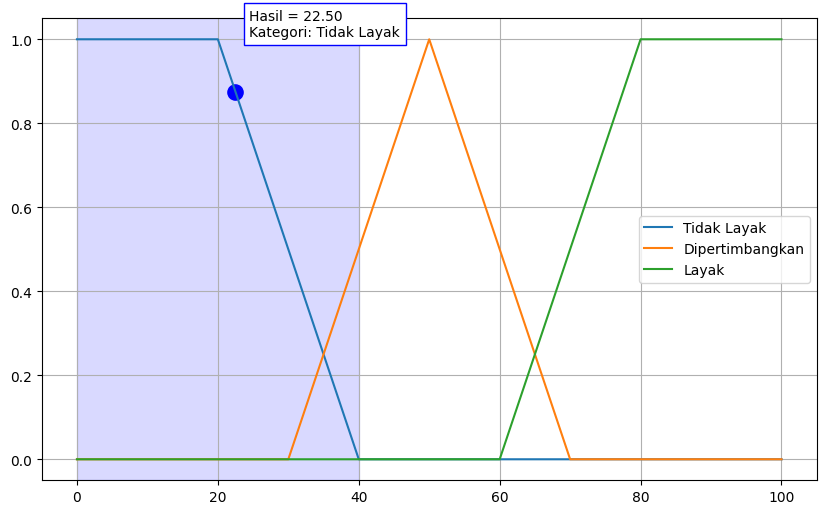

In [56]:
plot_output_with_annotation(result)
